<a href="https://colab.research.google.com/github/Aadi010105/AI-Driven-B2B-Lead-Scoring-and-Account-Based-Marketing-ABM-Optimization-System/blob/main/LeadScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
lead_data.sample(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5510,8eceb470-cebd-4136-ad99-03b2c38650f0,607639,Landing Page Submission,Direct Traffic,No,No,1,4.0,1188,4.0,...,No,NaN,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,Yes,SMS Sent
4886,e9adfebe-b980-4239-8e11-14f91fd07f92,613102,API,Olark Chat,Yes,No,0,0.0,0,0.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,SMS Sent
2674,35889727-7371-40f3-8451-b267a328a283,633959,Lead Add Form,Reference,No,No,1,0.0,0,0.0,...,No,Potential Lead,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
3753,0e38ff03-f06f-432f-b084-5288c7a1cf18,624199,API,Google,No,No,0,1.0,316,1.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified
3107,02fd70ad-acc2-4ae0-a6dc-856804c3da05,630079,Landing Page Submission,Organic Search,Yes,No,0,5.0,71,5.0,...,No,NaN,Other Metro Cities,NaN,NaN,NaN,NaN,No,Yes,SMS Sent


In [9]:
lead_data.shape


(9240, 37)

In [10]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Describing Data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


DATA Cleaning

In [12]:
#Converting Select to NaN
lead_data = lead_data.replace('Select', np.nan)

In [13]:
#Null Value Check
lead_data.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [14]:
#Null Percentage across column
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


In [15]:
#Drop Columns with percentage =< 40%
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [16]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100


,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

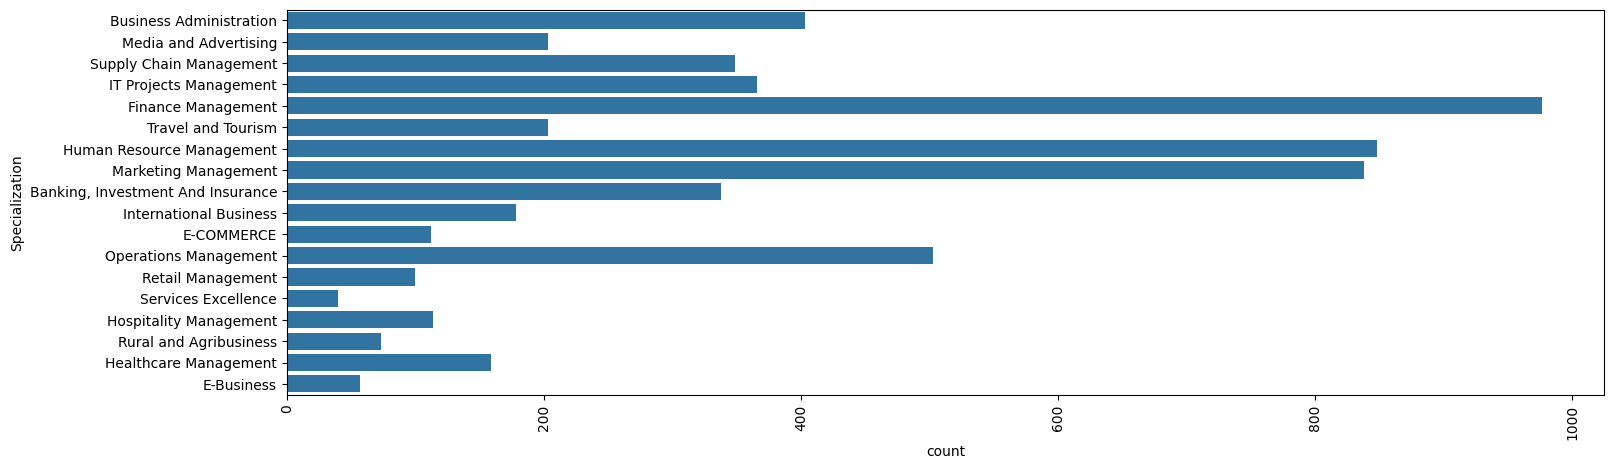

In [17]:
#1) Column: 'Specialization
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [18]:
#Creating A Seprate Column for Missing Values
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

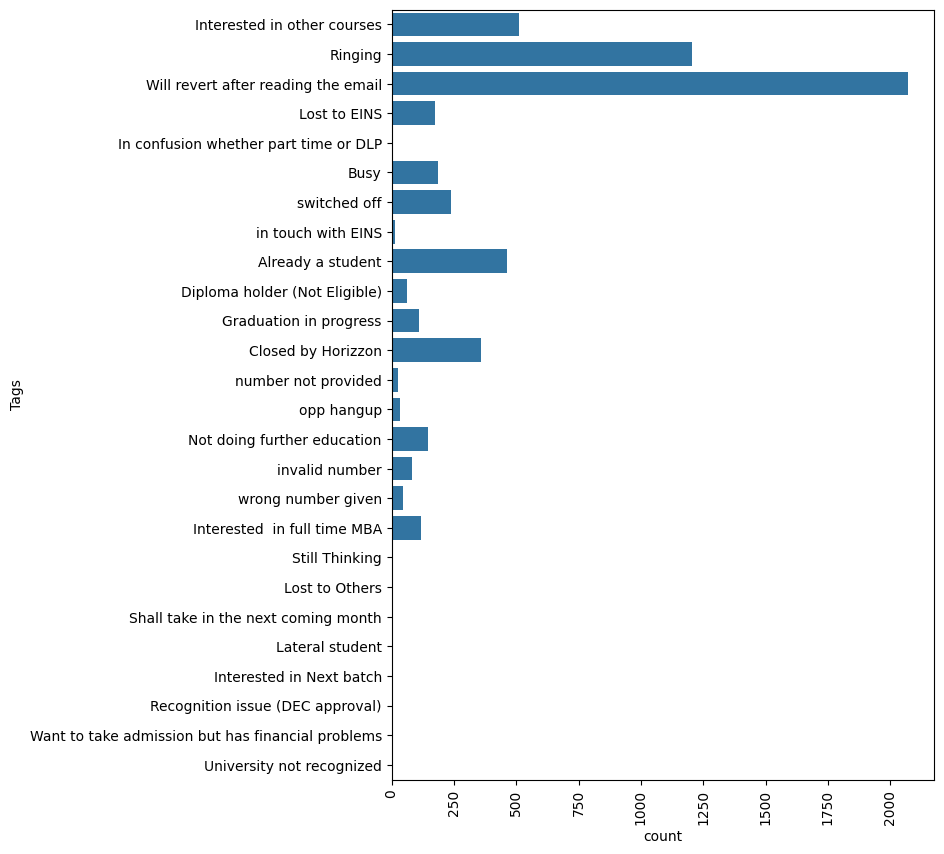

In [19]:
#2) Tags Column
plt.figure(figsize=(7,10))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [20]:
#Most values here are "will revert after reading this email" so impute missing values with this
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

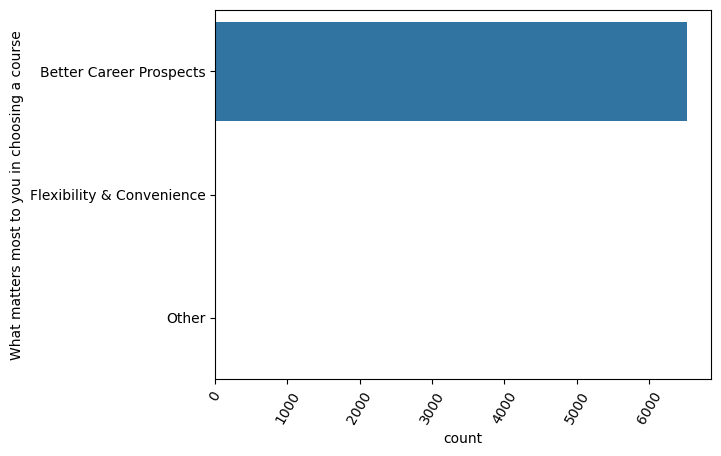

In [21]:
#3)Column : 'What matters most to you in choosing a course'
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=60)

In [22]:
#Drop this column as all the values are of "Better Career Prospects"
lead_data=lead_data.drop(columns=['What matters most to you in choosing a course'])

In [23]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


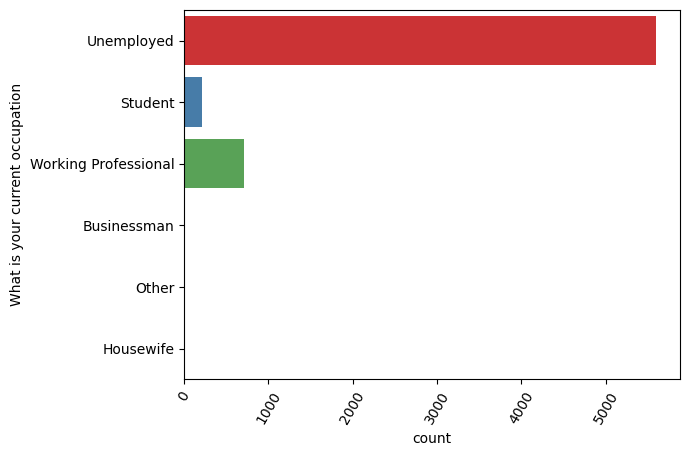

In [24]:
#4) Column: 'What is your current occupation'
sns.countplot(lead_data['What is your current occupation'],palette='Set1')
plt.xticks(rotation=60);

In [25]:
#As most values are "Unemoplyed" in this column we can impute missing values in this column
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

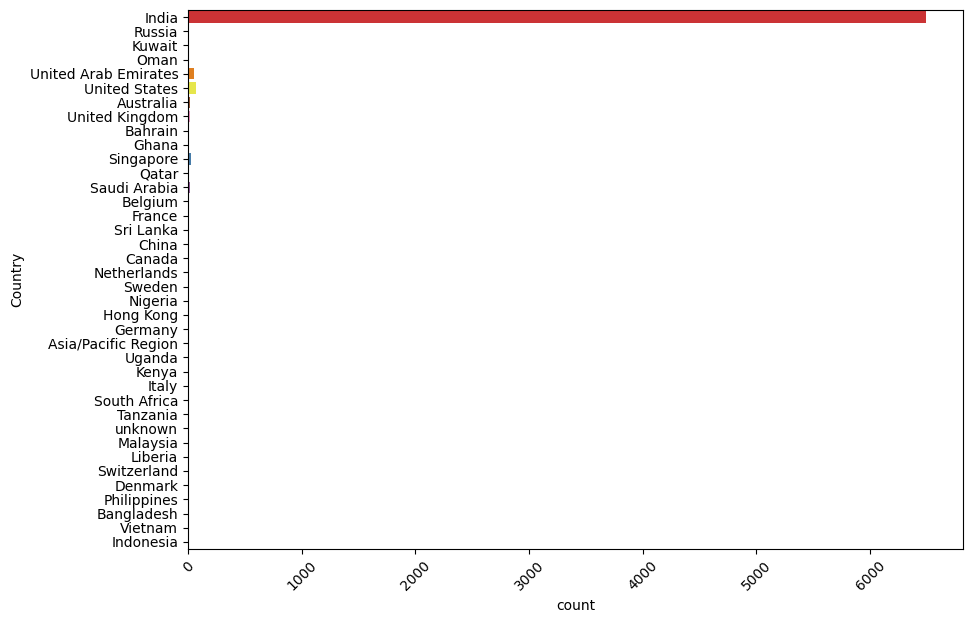

In [26]:
#5)Column: Country
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Country'],palette='Set1')
plt.xticks(rotation=45)

In [27]:
#Most values are 'India' we can impute it in place of Missing Values
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500')])

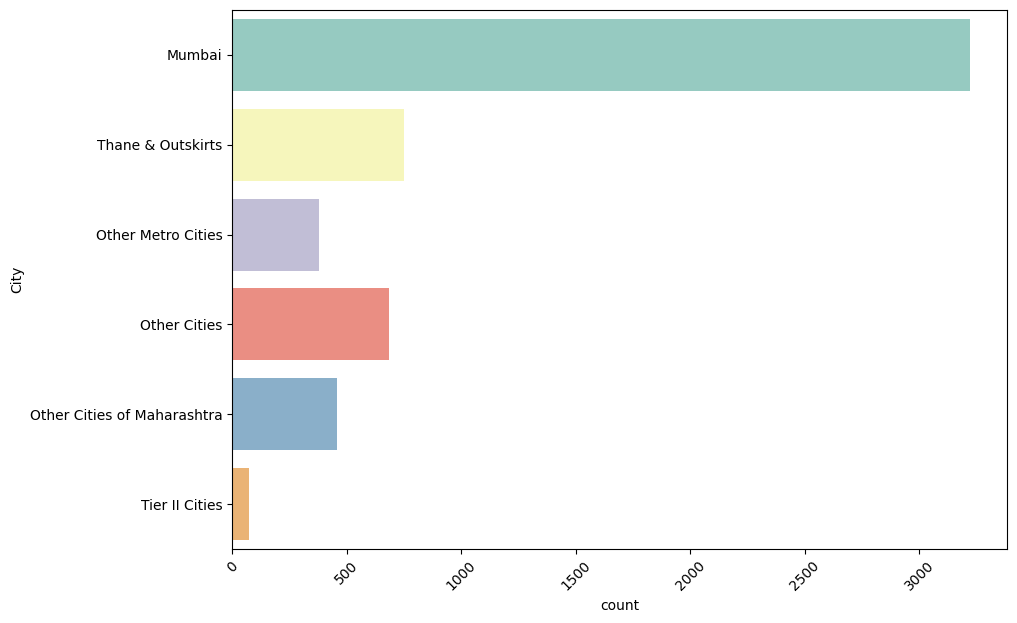

In [28]:
#6)Column : 'City'
plt.figure(figsize=(10,7))
sns.countplot(lead_data['City'],palette='Set3')
plt.xticks(rotation=45)


In [29]:
#Impute Missing Values with Mumbai
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [30]:
#NULL percentage after updating the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


Rest missing values are under 2% so we can drop these rows.
Dropping the rows with NULL values now



In [31]:
lead_data.dropna(inplace = True)

Now we don't have any missing values

## Exploratory Data Anaysis

In [32]:
#Checking For Duplcates
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [33]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

<Axes: xlabel='Lead Origin', ylabel='count'>

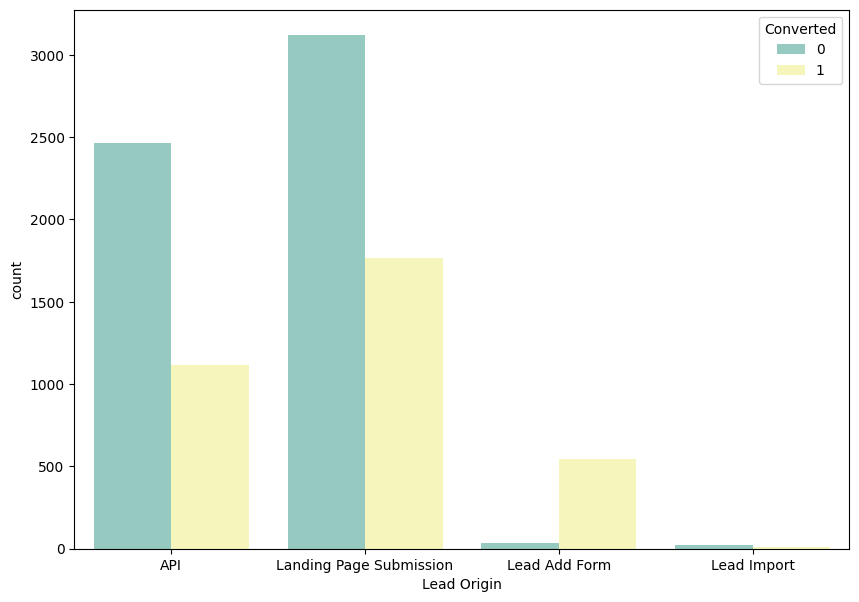

In [34]:
#Lead Origin
plt.figure(figsize=(10,7))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set3')


In [35]:
lead_data['Lead Source']=lead_data['Lead Source'].replace(to_replace='google',value='Google')

In [36]:
lead_data['Lead Source']=lead_data['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Others')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

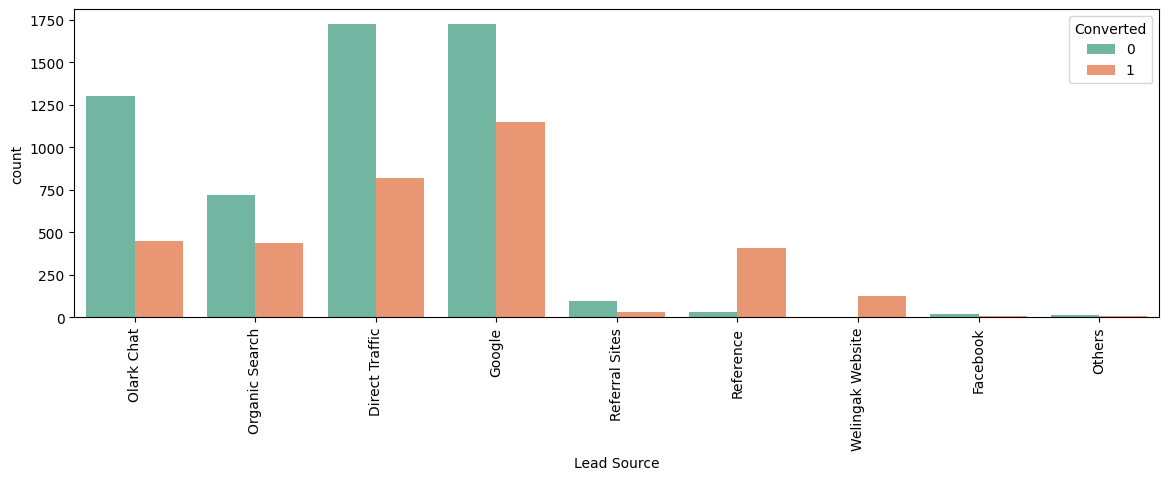

In [37]:
#Lead Source
plt.figure(figsize=(14,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

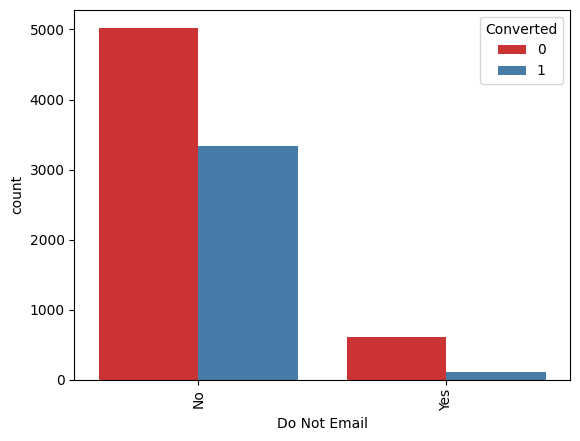

In [38]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [39]:
#TotalVisits
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
5%,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
90%,7.000000
95%,10.000000


<Axes: ylabel='TotalVisits'>

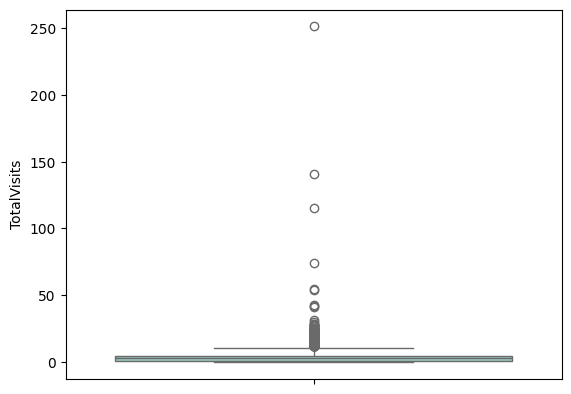

In [40]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set3')

In [41]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='TotalVisits'>

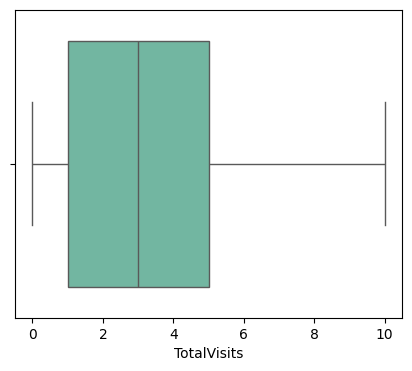

In [42]:
plt.figure(figsize=(5,4))
sns.boxplot(lead_data['TotalVisits'],orient='h',palette='Set2')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

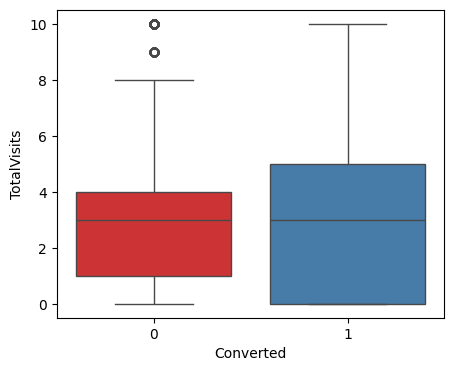

In [43]:
plt.figure(figsize=(5,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

In [44]:
#Total Time Spent on Website
lead_data['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

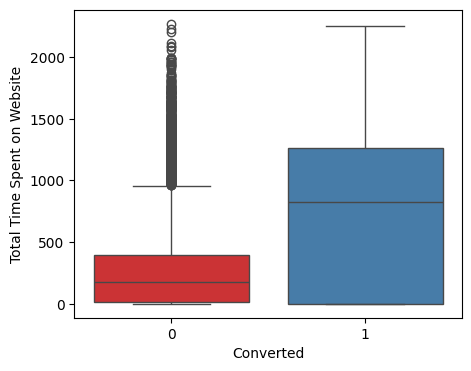

In [45]:
plt.figure(figsize=(5,4))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,orient='v',palette='Set1')

<Axes: ylabel='Page Views Per Visit'>

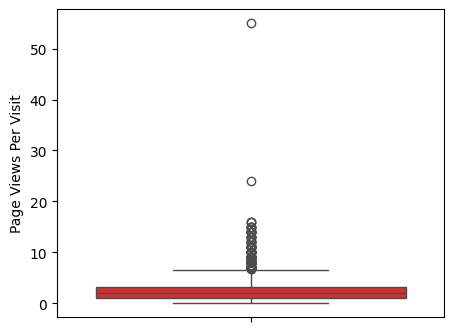

In [46]:
plt.figure(figsize=(5,4))
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

In [47]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
print(percentiles[0],percentiles[1])
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

0.0 6.0


<Axes: ylabel='Page Views Per Visit'>

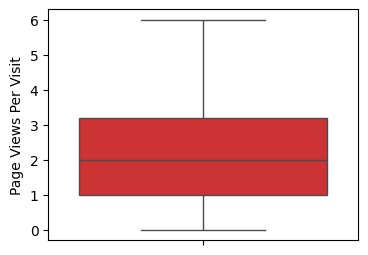

In [48]:
plt.figure(figsize=(4,3))
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

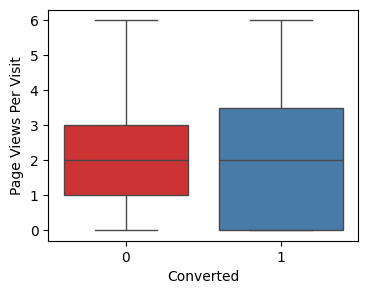

In [49]:
plt.figure(figsize=(4,3))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

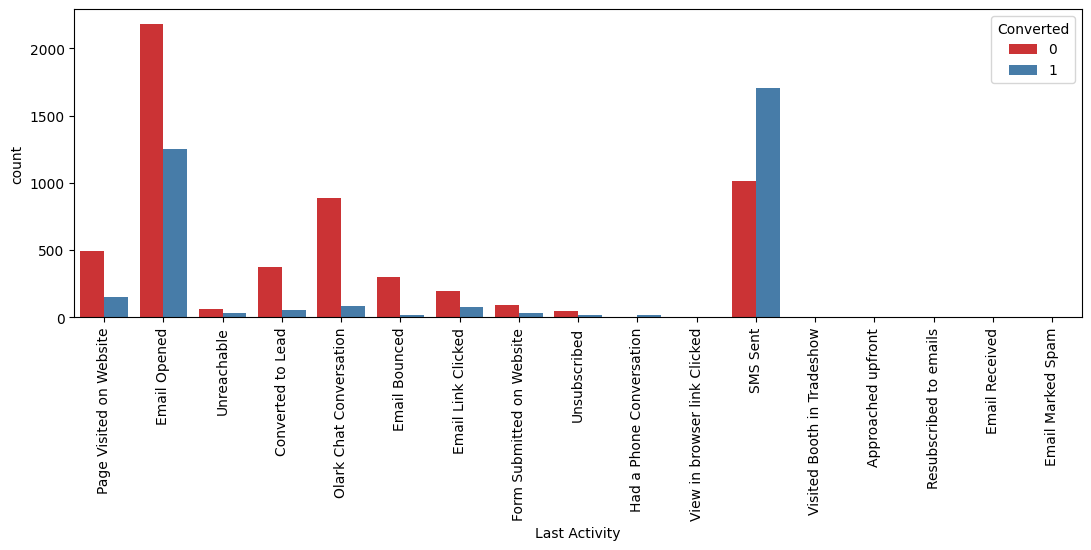

In [50]:
#Last Activity
plt.figure(figsize=(13,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90);

In [51]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

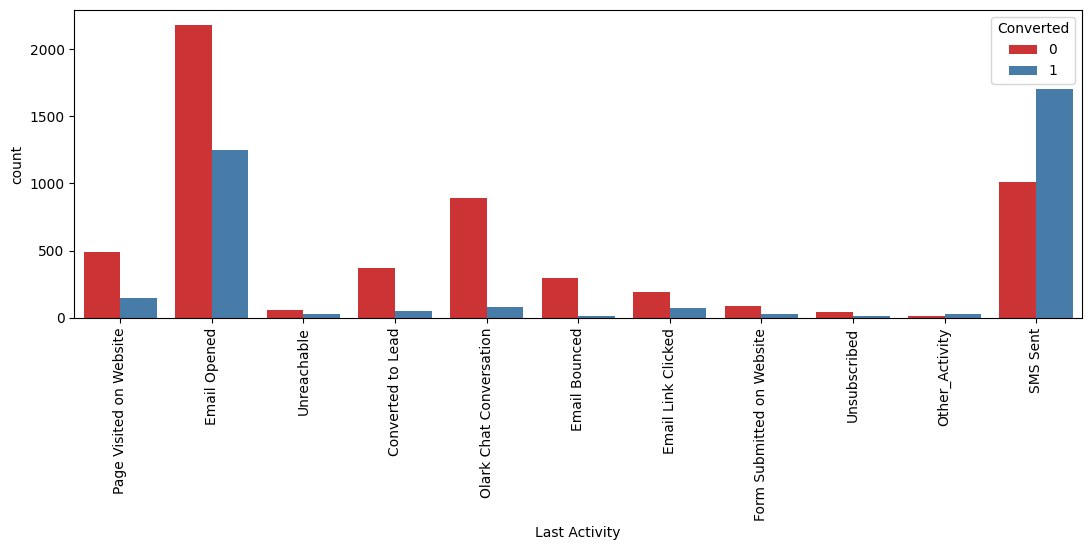

In [52]:
plt.figure(figsize=(13,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

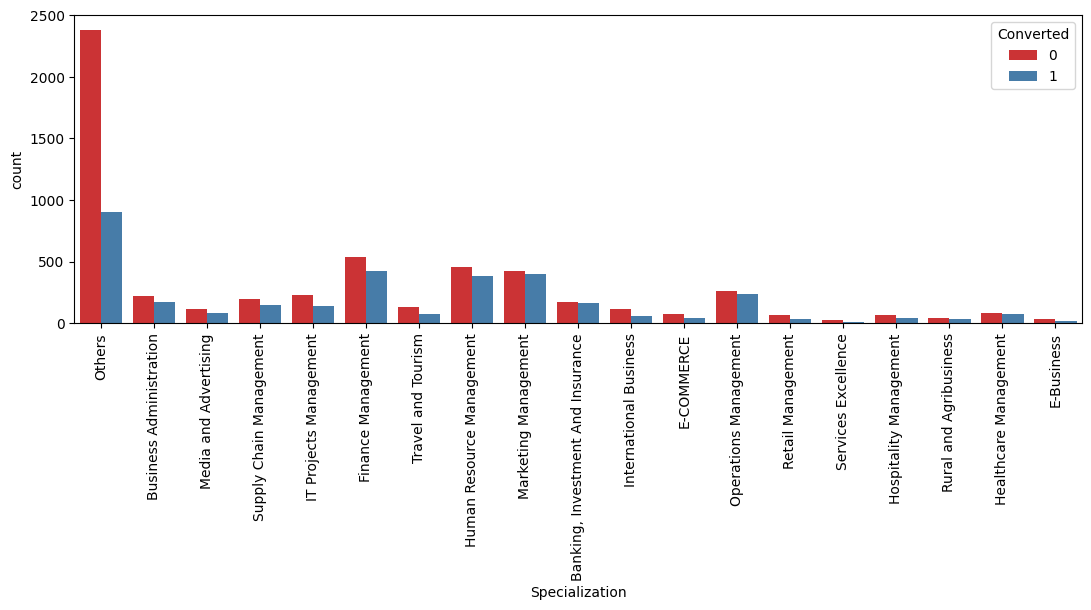

In [53]:
#Specialization
plt.figure(figsize=(13,4))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90);

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

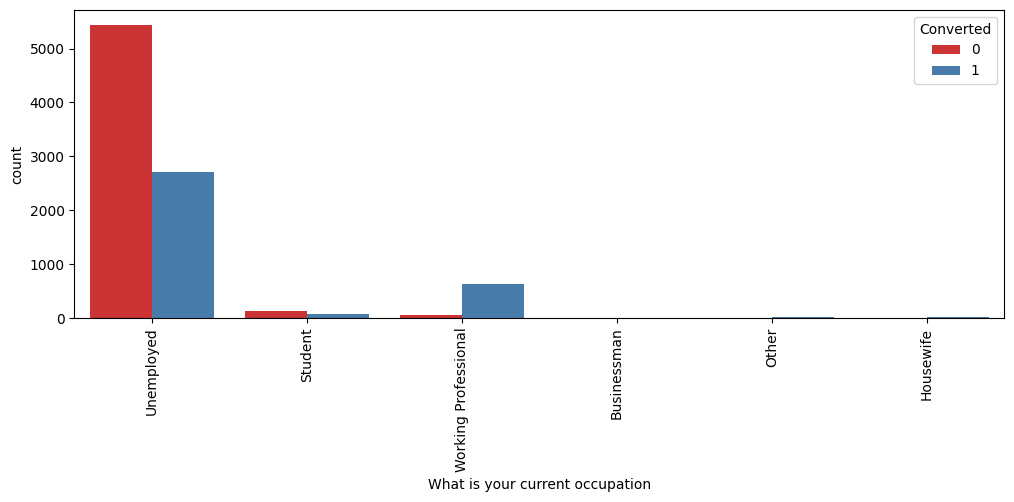

In [54]:
plt.figure(figsize=(12,4))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

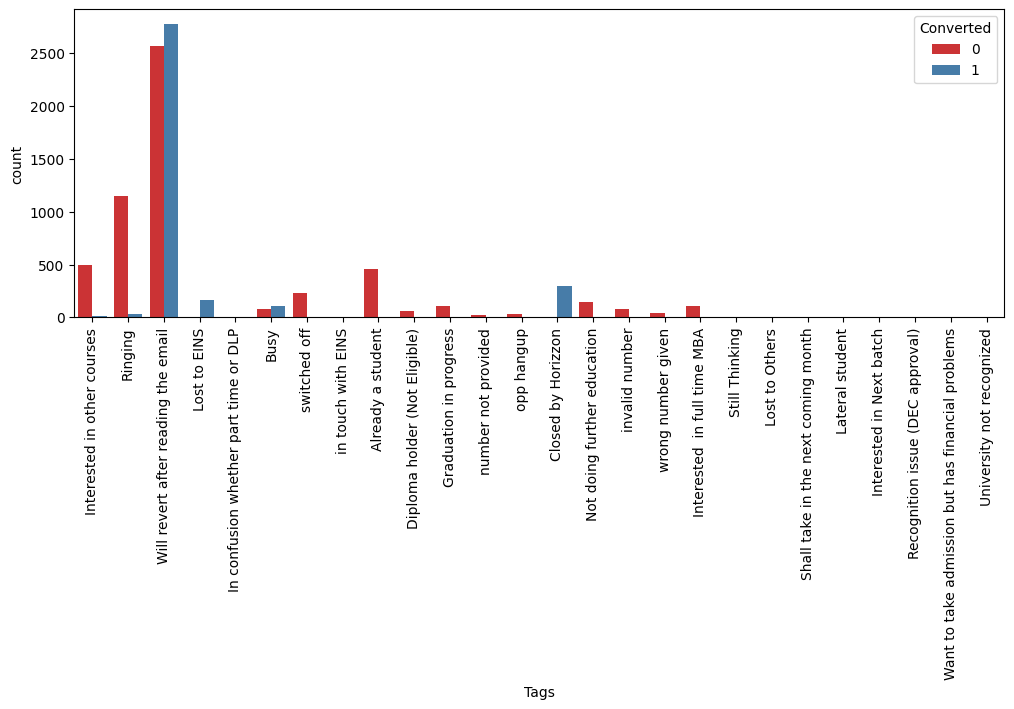

In [55]:
#Tags
plt.figure(figsize=(12,4))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90);

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

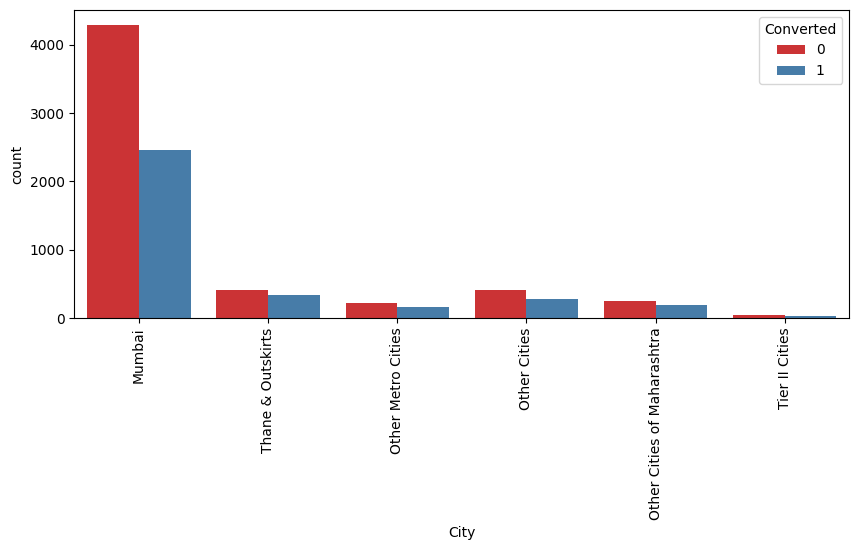

In [56]:
plt.figure(figsize=(10,4))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

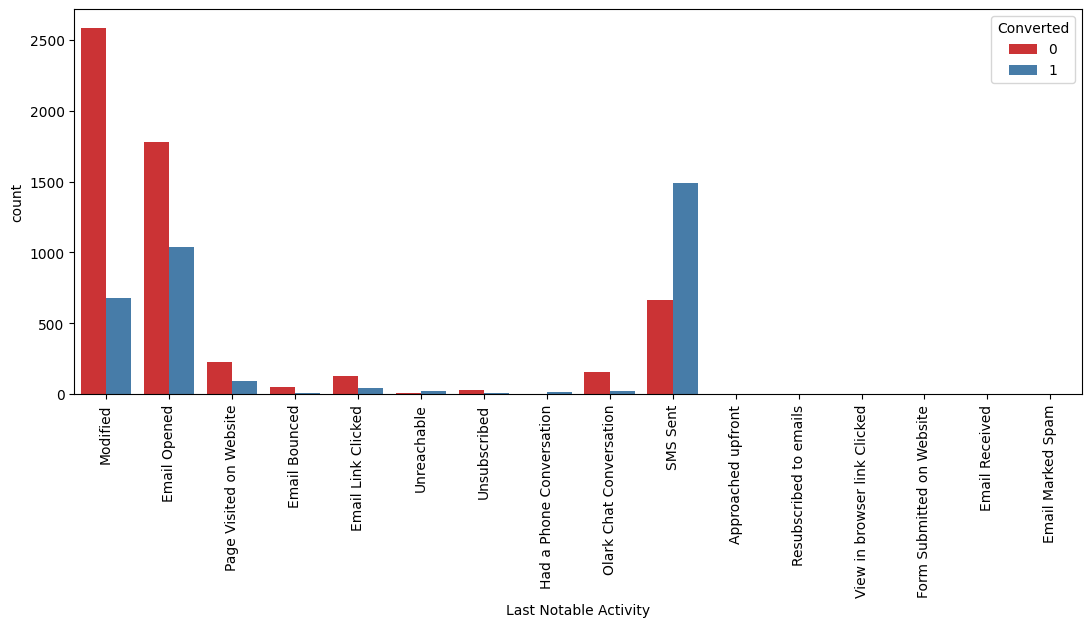

In [57]:
#Last Notable Activity
plt.figure(figsize=(13,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90);

In [58]:
#Based on the univariate analysis we have seen that many columns are not adding any information to the model,
#hence we can drop them for further analysis
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [59]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

# Data Prepration

In [60]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [61]:
lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']]

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Others,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Other_Activity,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,SMS Sent


In [62]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [63]:
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [64]:
print(lead_data.shape)  # Check rows and columns before

(9074, 78)


In [65]:
lead_data = lead_data.loc[:, ~lead_data.columns.duplicated()]
print(lead_data.shape)  # Check rows and columns after

(9074, 78)


In [66]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Origin                                           9074 non-null   object 
 2   Lead Source                                           9074 non-null   object 
 3   Do Not Email                                          9074 non-null   int64  
 4   Do Not Call                                           9074 non-null   int64  
 5   Converted                                             9074 non-null   int64  
 6   TotalVisits                                           9074 non-null   float64
 7   Total Time Spent on Website                           9074 non-null   int64  
 8   Page Views Per Visit                                  9074 non-

In [67]:
#Dropping the columns for which dummies were created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

# Already Executed So Throwing Error,When Running the Cell Again

In [68]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False


### **3) Splitting the data into train and test set.**

In [69]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [70]:

# Putting target variable to y
y = lead_data['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**4)Scaling the features**

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1012,1,0,-0.432779,-0.540048,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9226,0,0,-1.150329,-0.888650,-1.265540,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4750,0,0,-0.432779,1.643304,-0.155018,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7987,0,0,0.643547,2.017593,0.122613,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [73]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

### Feature Selection Using RFE

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE  #RFE is a feature selection technique.
rfe = RFE(estimator=logreg, n_features_to_select=20)  # Correct syntax
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_  #Gives boolean array of the selected features

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False, False])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))  #Give the ranking of all columns, and Ranking 1 for selected column

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),


In [77]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### **MODEL BUILDING**

In [78]:
for col in cols:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)


In [79]:
#Model 1
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.6
Date:                Mon, 27 Jan 2025   Deviance:                       5163.2
Time:                        11:50:36   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2957      0.244      1.210      0.226      -0.183       0.775
Do Not Email                                            -1.6977      0.190     -8.919      0.000      -2.071      -1.325
Total Time Spent on Website                              1.1078      0.041     27.173      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1324      0.129     -8.765      0.000      -1.386      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9816      0.478      2.055      0.040       0.045       1.918
Lead Source_Olark Chat                                   1.1267      0.124      9.078      0.000       0.883       1.370
Lead Source_Reference                                    1.8425      0.932      1.977      0.048       0.016       3.669
Lead Source_Welingak Website                             4.4175      1.162      3.802      0.000       2.140       6.695
Last Activity_Olark Chat Conversation                   -1.0574      0.173     -6.108      0.000      -1.397      -0.718
Last Activity_Other_Activity                             1.7530      0.533      3.289      0.001       0.708       2.798
Last Activity_SMS Sent                                   0.7692      0.157      4.908      0.000       0.462       1.076
Last Activity_Unsubscribed                               1.4489      0.480      3.019      0.003       0.508       2.390
Specialization_Others                                   -1.1469      0.126     -9.120      0.000      -1.393      -0.900
What is your current occupation_Housewife               22.2965   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Unemployed              -0.5238      0.217     -2.414      0.016      -0.949      -0.098
What is your current occupation_Working Professional     2.0950      0.286      7.323      0.000       1.534       2.656
Last Notable Activity_Had a Phone Conversation           1.6042      1.222      1.313      0.189      -0.791       3.999
Last Notable Activity_Modified                          -0.6337      0.097     -6.527      0.000      -0.824      -0.443
Last Notable Activity_SMS Sent                           0.7470      0.177      4.211      0.000       0.399       1.095
Last Notable Activity_Unreachable                        1.6470      0.476      3.462      0.001       0.715       2.579
========================================================================================================================
"""



*  A significant intercept **(low p-value) indicates** that the model needs
the constant column to better explain the dependent variable when predictors are zero.
*  If the intercept is not significant **(high p-value)**, it suggests that the *constant term might not add much value to the model's predictive ability*.

In [80]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [81]:
#Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.8
Date:                Mon, 27 Jan 2025   Deviance:                       5169.6
Time:                        11:50:36   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3805      0.240      1.586      0.113      -0.090       0.851
Do Not Email                                            -1.7004      0.190     -8.934      0.000      -2.073      -1.327
Total Time Spent on Website                              1.1070      0.041     27.178      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1317      0.129     -8.767      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9801      0.478      2.052      0.040       0.044       1.916
Lead Source_Olark Chat                                   1.1243      0.124      9.061      0.000       0.881       1.367
Lead Source_Reference                                    1.8504      0.932      1.986      0.047       0.024       3.677
Lead Source_Welingak Website                             4.4184      1.162      3.803      0.000       2.141       6.696
Last Activity_Olark Chat Conversation                   -1.0588      0.173     -6.115      0.000      -1.398      -0.719
Last Activity_Other_Activity                             1.7546      0.533      3.291      0.001       0.710       2.800
Last Activity_SMS Sent                                   0.7700      0.157      4.913      0.000       0.463       1.077
Last Activity_Unsubscribed                               1.4503      0.480      3.022      0.003       0.510       2.391
Specialization_Others                                   -1.1490      0.126     -9.143      0.000      -1.395      -0.903
What is your current occupation_Unemployed              -0.6061      0.212     -2.858      0.004      -1.022      -0.190
What is your current occupation_Working Professional     2.0118      0.282      7.127      0.000       1.458       2.565
Last Notable Activity_Had a Phone Conversation           1.5992      1.222      1.309      0.191      -0.796       3.994
Last Notable Activity_Modified                          -0.6369      0.097     -6.565      0.000      -0.827      -0.447
Last Notable Activity_SMS Sent                           0.7434      0.177      4.191      0.000       0.396       1.091
Last Notable Activity_Unreachable                        1.6440      0.476      3.455      0.001       0.711       2.577
========================================================================================================================
"""

"Last Notable Activity_Had a Phone Conversatiop" drop this HIGH p-value

In [82]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [83]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Mon, 27 Jan 2025   Deviance:                       5171.6
Time:                        11:50:36   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3851      0.240      1.605      0.108      -0.085       0.855
Do Not Email                                            -1.7034      0.191     -8.936      0.000      -2.077      -1.330
Total Time Spent on Website                              1.1059      0.041     27.161      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1320      0.129     -8.772      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5400      0.908      1.695      0.090      -0.240       3.320
Lead Origin_Lead Import                                  0.9771      0.478      2.045      0.041       0.041       1.914
Lead Source_Olark Chat                                   1.1214      0.124      9.037      0.000       0.878       1.365
Lead Source_Reference                                    1.8487      0.932      1.984      0.047       0.022       3.675
Lead Source_Welingak Website                             4.4197      1.162      3.804      0.000       2.142       6.697
Last Activity_Olark Chat Conversation                   -1.0516      0.173     -6.075      0.000      -1.391      -0.712
Last Activity_Other_Activity                             2.1650      0.459      4.714      0.000       1.265       3.065
Last Activity_SMS Sent                                   0.7774      0.157      4.962      0.000       0.470       1.085
Last Activity_Unsubscribed                               1.4520      0.480      3.025      0.002       0.511       2.393
Specialization_Others                                   -1.1534      0.126     -9.179      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6051      0.212     -2.852      0.004      -1.021      -0.189
What is your current occupation_Working Professional     2.0084      0.282      7.114      0.000       1.455       2.562
Last Notable Activity_Modified                          -0.6472      0.097     -6.683      0.000      -0.837      -0.457
Last Notable Activity_SMS Sent                           0.7329      0.177      4.135      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6401      0.476      3.447      0.001       0.708       2.573
========================================================================================================================
"""

In [84]:
col1= col1.drop('Lead Origin_Lead Add Form')

In [85]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.4
Date:                Mon, 27 Jan 2025   Deviance:                       5174.8
Time:                        11:50:36   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4017      0.240      1.675      0.094      -0.068       0.872
Do Not Email                                            -1.7052      0.191     -8.945      0.000      -2.079      -1.332
Total Time Spent on Website                              1.1038      0.041     27.153      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1502      0.129     -8.935      0.000      -1.402      -0.898
Lead Origin_Lead Import                                  0.9609      0.478      2.010      0.044       0.024       1.898
Lead Source_Olark Chat                                   1.1144      0.124      9.000      0.000       0.872       1.357
Lead Source_Reference                                    3.3740      0.243     13.878      0.000       2.898       3.851
Lead Source_Welingak Website                             5.9508      0.732      8.133      0.000       4.517       7.385
Last Activity_Olark Chat Conversation                   -1.0563      0.173     -6.104      0.000      -1.396      -0.717
Last Activity_Other_Activity                             2.1606      0.459      4.705      0.000       1.261       3.061
Last Activity_SMS Sent                                   0.7744      0.157      4.944      0.000       0.467       1.081
Last Activity_Unsubscribed                               1.4506      0.480      3.023      0.003       0.510       2.391
Specialization_Others                                   -1.1653      0.126     -9.282      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.6023      0.212     -2.839      0.005      -1.018      -0.186
What is your current occupation_Working Professional     2.0080      0.282      7.111      0.000       1.455       2.561
Last Notable Activity_Modified                          -0.6466      0.097     -6.681      0.000      -0.836      -0.457
Last Notable Activity_SMS Sent                           0.7368      0.177      4.159      0.000       0.390       1.084
Last Notable Activity_Unreachable                        1.6358      0.476      3.438      0.001       0.703       2.568
========================================================================================================================
"""

Checking for VIF values:   

* VIF 1: No correlation.
* VIF 1-5: Moderate correlation, not problematic.
* VIF > 5 (or 10): High multicollinearity, may inflate standard errors and destabilize the model.

In [86]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.81
15,Last Notable Activity_SMS Sent,6.48
9,Last Activity_SMS Sent,6.26
2,Lead Origin_Landing Page Submission,5.75
11,Specialization_Others,4.00
14,Last Notable Activity_Modified,2.47
4,Lead Source_Olark Chat,2.24
13,What is your current occupation_Working Profes...,1.67
7,Last Activity_Olark Chat Conversation,1.63
5,Lead Source_Reference,1.46


In [87]:
col1 = col1.drop('What is your current occupation_Unemployed')

In [88]:
#Model 6
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Mon, 27 Jan 2025   Deviance:                       5182.6
Time:                        11:50:37   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1714      0.128     -1.336      0.182      -0.423       0.080
Do Not Email                                            -1.7006      0.191     -8.913      0.000      -2.075      -1.327
Total Time Spent on Website                              1.1038      0.041     27.169      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1542      0.129     -8.960      0.000      -1.407      -0.902
Lead Origin_Lead Import                                  0.9417      0.478      1.970      0.049       0.005       1.878
Lead Source_Olark Chat                                   1.1201      0.124      9.045      0.000       0.877       1.363
Lead Source_Reference                                    3.3857      0.243     13.945      0.000       2.910       3.861
Lead Source_Welingak Website                             5.9420      0.732      8.122      0.000       4.508       7.376
Last Activity_Olark Chat Conversation                   -1.0474      0.173     -6.060      0.000      -1.386      -0.709
Last Activity_Other_Activity                             2.1424      0.459      4.663      0.000       1.242       3.043
Last Activity_SMS Sent                                   0.7623      0.156      4.874      0.000       0.456       1.069
Last Activity_Unsubscribed                               1.4243      0.480      2.968      0.003       0.484       2.365
Specialization_Others                                   -1.1772      0.126     -9.362      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.5908      0.194     13.327      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6545      0.097     -6.764      0.000      -0.844      -0.465
Last Notable Activity_SMS Sent                           0.7326      0.177      4.139      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6195      0.474      3.414      0.001       0.690       2.549
========================================================================================================================
"""

In [89]:
col1 = col1.drop('Lead Origin_Lead Import')

In [90]:
#Model 7
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 27 Jan 2025   Deviance:                       5186.2
Time:                        11:50:37   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1281      0.127     -1.012      0.312      -0.376       0.120
Do Not Email                                            -1.7017      0.191     -8.922      0.000      -2.076      -1.328
Total Time Spent on Website                              1.0961      0.040     27.161      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1915      0.128     -9.333      0.000      -1.442      -0.941
Lead Source_Olark Chat                                   1.0930      0.123      8.897      0.000       0.852       1.334
Lead Source_Reference                                    3.3495      0.242     13.839      0.000       2.875       3.824
Lead Source_Welingak Website                             5.9157      0.731      8.088      0.000       4.482       7.349
Last Activity_Olark Chat Conversation                   -1.0509      0.173     -6.081      0.000      -1.390      -0.712
Last Activity_Other_Activity                             2.1337      0.459      4.648      0.000       1.234       3.033
Last Activity_SMS Sent                                   0.7691      0.156      4.920      0.000       0.463       1.076
Last Activity_Unsubscribed                               1.4192      0.479      2.961      0.003       0.480       2.359
Specialization_Others                                   -1.1999      0.126     -9.553      0.000      -1.446      -0.954
What is your current occupation_Working Professional     2.5913      0.194     13.336      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6587      0.097     -6.812      0.000      -0.848      -0.469
Last Notable Activity_SMS Sent                           0.7200      0.177      4.072      0.000       0.373       1.066
Last Notable Activity_Unreachable                        1.6073      0.474      3.389      0.001       0.678       2.537
========================================================================================================================
"""

In [91]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.25
12,Last Notable Activity_Modified,2.35
10,Specialization_Others,2.21
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.79
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [92]:
col1 = col1.drop('Last Activity_Unsubscribed','Last Notable Activity_Unreachable')

In [93]:
col1 = col1.drop('Last Notable Activity_Unreachable')

In [94]:
#Model 8
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.8
Date:                Mon, 27 Jan 2025   Deviance:                       5205.5
Time:                        11:50:37   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0903      0.126     -0.716      0.474      -0.337       0.157
Do Not Email                                            -1.5409      0.177     -8.718      0.000      -1.887      -1.195
Total Time Spent on Website                              1.0938      0.040     27.176      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.1991      0.128     -9.403      0.000      -1.449      -0.949
Lead Source_Olark Chat                                   1.0827      0.123      8.835      0.000       0.843       1.323
Lead Source_Reference                                    3.3251      0.241     13.769      0.000       2.852       3.798
Lead Source_Welingak Website                             5.8627      0.730      8.035      0.000       4.433       7.293
Last Activity_Olark Chat Conversation                   -1.0589      0.173     -6.132      0.000      -1.397      -0.720
Last Activity_Other_Activity                             2.1109      0.459      4.596      0.000       1.211       3.011
Last Activity_SMS Sent                                   0.7605      0.156      4.875      0.000       0.455       1.066
Specialization_Others                                   -1.2039      0.125     -9.598      0.000      -1.450      -0.958
What is your current occupation_Working Professional     2.5947      0.194     13.407      0.000       2.215       2.974
Last Notable Activity_Modified                          -0.6878      0.096     -7.138      0.000      -0.877      -0.499
Last Notable Activity_SMS Sent                           0.6896      0.176      3.911      0.000       0.344       1.035
========================================================================================================================
"""

In [95]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.41
8,Last Activity_SMS Sent,6.25
11,Last Notable Activity_Modified,2.34
9,Specialization_Others,2.20
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.77
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19


In [96]:
col1 = col1.drop('Last Notable Activity_SMS Sent')

In [97]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


In [113]:
#MODEL 9
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Mon, 27 Jan 2025   Deviance:                       5221.0
Time:                        11:55:05   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

**Making Prediction on the Train set**

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
3009,0.196697
1012,0.125746
9226,0.323477
4750,0.865617
7987,0.797752
1281,0.744001
2880,0.100027
4971,0.965845
7536,0.854512
1248,0.768071


In [100]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [102]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


Making the Confusion Matrix

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Importing necessary functions from sklearn.metrics

accuracy = accuracy_score(y_train_pred_final.Converted, )
conf_matrix = confusion_matrix(y_train_pred_final.Converted, )
class_report = classification_report(y_train_pred_final.Converted, )

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8169
Confusion Matrix:
[[3461  444]
 [ 719 1727]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3905
           1       0.80      0.71      0.75      2446

    accuracy                           0.82      6351
   macro avg       0.81      0.80      0.80      6351
weighted avg       0.82      0.82      0.81      6351



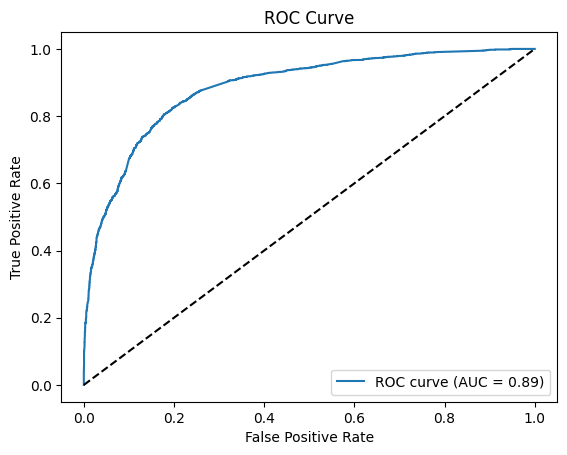

In [118]:
def draw_roc(actual, probs):
    fpr, tpr, _ = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [119]:
import joblib

joblib.dump(result, 'logreg_model.pkl')
print("Model saved successfully!")

columns_used_in_training = cols
joblib.dump(columns_used_in_training, 'columns_used_in_training.pkl')
print("Feature columns saved successfully!")

Model saved successfully!
Feature columns saved successfully!
